In [399]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [400]:
# set working directory
os.chdir(r'C:\Users\ilike\Documents\CEU\Courses\2021_Spring\Mastering the process of data science\Assignment')

In [401]:
# set style for plots
plt.style.use('seaborn-notebook')

## Data preparation and understanding

### 1. Read and prepare Drinks.csv

In [402]:
# read data in
drinks = pd.read_csv("Drinks.csv", sep=",")

In [403]:
drinks.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,NaN
1,Albania,89,132,54,NaN
2,Algeria,25,0,14,NaN


In [404]:
# drinks dataframe consists of 5 variables and 195 rows
drinks.shape

(193, 5)

In [405]:
drinks.dtypes

country                          object
beer_servings                    object
spirit_servings                  object
wine_servings                    object
total_litres_of_pure_alcohol    float64
dtype: object

In [406]:
# check the unique values
drinks['beer_servings'].unique()

array(['0', '89', '25', '245', '217', '102', '193', '21', '261', '279',
       '122', '42', '143', '142', '295', '263', '34', '23', '167', '76',
       '173', '31', '231', '88', '144', '57', '147', '240', '17', '15',
       '130', '79', '159', '1', '149', '37', '230', '93', '192', '361',
       '224', '52', '32', '162', '6', '92', '18', '20', '77', '127',
       '347', '8', '346', '133', '199', '53', '9', '28', '69', '234',
       '233', '5', '313', '63', '85', '82', '124', '58', '62', '281',
       '19', '343', '236', '?', '26', '13', '98', '238', '109', '12',
       '47', '376', '49', '251', '203', '78', '3', '188', '169', '22',
       '306', '285', '44', '213', '163', '71', '194', '297', '247', '43',
       '105', '56', '283', '157', '60', '196', '270', '225', '140', '284',
       '16', '171', '120', '128', '90', '152', '185', '2', '36', '99',
       '197', '51', '45', '206', '219', '115', '249', '333', '111', '64'],
      dtype=object)

At one place there is a questionmark, which should be removed or replaced. Since the values are very different for the countries
I am not going to calculate the mean but inpute NaN (also there are some 0-s, so giving zero for these countries would mean I am adding not valid data)

In [407]:
# First, let's see which record is that:
drinks[drinks['beer_servings']=='?']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
99,Macedonia,?,27,86,NaN


In [408]:
# replace ? with NaN
drinks['beer_servings'].replace('?',np.nan,inplace=True)

In [409]:
# now I try to convert to integer
drinks['beer_servings'] = pd.to_numeric(drinks.beer_servings, errors='coerce')

In [410]:
# check if it worked
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                  object
wine_servings                    object
total_litres_of_pure_alcohol    float64
dtype: object

In [411]:
# now check unique values similarly for the two other columns
drinks['spirit_servings'].unique()
drinks['wine_servings'].unique()

array(['0', '54', '14', '312', '45', '221', '11', '212', '191', '5', '?',
       '7', '36', '42', '8', '13', '35', '16', '1', '94', '4', '100',
       '172', '3', '9', '74', '254', '113', '134', '278', '26', '2',
       '233', '59', '97', '370', '149', '175', '10', '218', '28', '21',
       '185', '78', '165', '237', '12', '6', '123', '62', '31', '56',
       '271', '86', '120', '18', '128', '190', '129', '23', '339', '167',
       '73', '24', '140', '127', '51', '116', '276', '81', '112', '32',
       '71', '186', '280', '19', '20', '195', '220', '84'], dtype=object)

In [412]:
# same issue with spirits column
drinks['spirit_servings'].replace('?',np.nan,inplace=True)
drinks['spirit_servings'] = pd.to_numeric(drinks.spirit_servings, errors='coerce')

In [413]:
# and with wine
drinks['wine_servings'].replace('?',np.nan,inplace=True)
drinks['wine_servings'] = pd.to_numeric(drinks.wine_servings, errors='coerce')

In [414]:
# all columns are numeric now
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                   float64
total_litres_of_pure_alcohol    float64
dtype: object

In [415]:
# check for duplicates
drinks.duplicated().sum()

0

There are no duplicates in the data.

In [416]:
# verify if the conversion worked well 
drinks.isnull().sum()

country                           0
beer_servings                     1
spirit_servings                   1
wine_servings                     1
total_litres_of_pure_alcohol    193
dtype: int64

I can see that there are the three NaN-s I previously added, but also see that the last column is 100% consisting of missing values.

<AxesSubplot:>

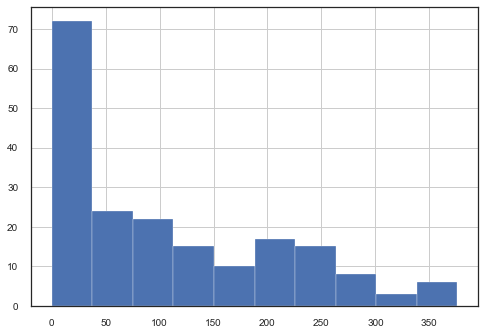

In [417]:
drinks['beer_servings'].hist()

<AxesSubplot:>

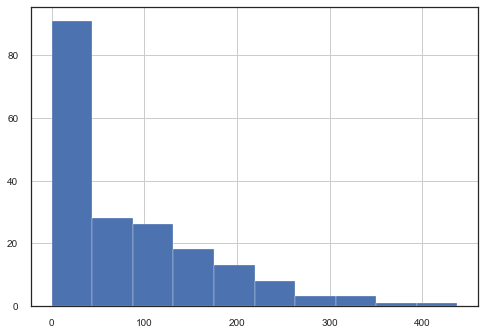

In [418]:
drinks['spirit_servings'].hist()

<AxesSubplot:>

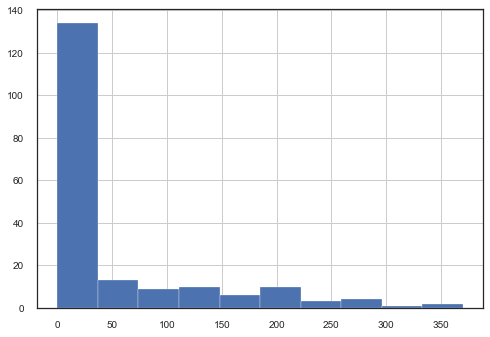

In [419]:
drinks['wine_servings'].hist()

From the histograms we can tell that the range for number of servings in terms of beer and wine is between 0-370ish, whilst for spirits it is a bit higher, around 430. Another statement could be that higher amount of beer servings are more common than that for wine as seen looking at the tails of the histograms.

In [420]:
drinks.describe(include='all')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193,192.000000,192.000000,192.000000,0.0
unique,193,NaN,NaN,NaN,NaN
top,Niger,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,106.161458,80.994792,49.442708,NaN
std,NaN,101.407529,88.515121,79.905880,NaN
min,NaN,0.000000,0.000000,0.000000,NaN
25%,NaN,20.000000,4.000000,1.000000,NaN
50%,NaN,73.500000,55.500000,8.000000,NaN
75%,NaN,189.000000,128.750000,59.750000,NaN


The above estimated numbers can be followed up on this summary statistic table. Indeed, maximum number of servings for beer (376) and for wine (370) are lower than for spirits (428) and the most variation is in the beer servings. Furthermore on average the number of servings for wine are the least and for beer the most. I would expect actually that wine servings will be on the second place and spirits come lastly. 

### 2. Calculate total liters of pure alcohol using the following information:
1 ounce = 0.0295 l
- Beer serving: 12 ounces, 5% alcohol
- Spirit serving: 1.5 ounces 40% alcohol
- Wine serving: 5 ounces, 12% alcohol

In [421]:
drinks.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0.0,0.0,0.0,NaN
1,Albania,89.0,132.0,54.0,NaN
2,Algeria,25.0,0.0,14.0,NaN
3,Andorra,245.0,138.0,312.0,NaN
4,Angola,217.0,57.0,45.0,NaN


In [422]:
# calculate total liters
drinks['total_litres_of_pure_alcohol'] = np.where(drinks['total_litres_of_pure_alcohol'].isnull() == True,12*0.0295*drinks['beer_servings']*0.05+1.5*0.0295*drinks['spirit_servings']*0.4+5*0.0295*drinks['wine_servings']*0.12, drinks['total_litres_of_pure_alcohol'])

In [423]:
# check calculation
drinks.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0.0,0.0,0.0,0.0000
1,Albania,89.0,132.0,54.0,4.8675
2,Algeria,25.0,0.0,14.0,0.6903


### 3. Read, understand and prepare LifeExpectancy.csv

In [424]:
# read in csv
life_expectancy = pd.read_csv("LifeExpectancy.csv", sep=",")

In [425]:
life_expectancy.head(3)

,GhoCode,GhoDisplay,PublishStateCode,PublishStateDisplay,YearCode,YearDisplay,RegionCode,RegionDisplay,WorldBankIncomeGroupGroupCode,WorldBankIncomeGroupDisplay,CountryCode,CountryDisplay,SexCode,SexDisplay,DisplayValue,Numeric
0,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,BTSX,Both sexes,61,61.25205
1,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,FMLE,Female,62,61.97733
2,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,MLE,Male,61,60.51228


In [426]:
life_expectancy.dtypes

GhoCode                           object
GhoDisplay                        object
PublishStateCode                  object
PublishStateDisplay               object
YearCode                           int64
YearDisplay                        int64
RegionCode                        object
RegionDisplay                     object
WorldBankIncomeGroupGroupCode     object
WorldBankIncomeGroupDisplay       object
CountryCode                       object
CountryDisplay                    object
SexCode                           object
SexDisplay                        object
DisplayValue                       int64
Numeric                          float64
dtype: object

The data types look good in the table: all text is string and the year and the life expectance value are integers, and available in a float as well with the precise number.

In [427]:
# check the latest available year
life_expectancy['YearDisplay'].unique()

array([2013, 2012, 2000, 1990], dtype=int64)

In [428]:
# check if there are duplicates
life_expectancy.duplicated().sum()

0

There are no duplicates in the data.

In [429]:
life_expectancy.shape

(6408, 16)

There are 16 variables and 6408 rows in this dataframe.

In [430]:
# check missing values in each column
life_expectancy.isnull().sum()

GhoCode                             0
GhoDisplay                          0
PublishStateCode                    0
PublishStateDisplay                 0
YearCode                            0
YearDisplay                         0
RegionCode                          0
RegionDisplay                       0
WorldBankIncomeGroupGroupCode    1164
WorldBankIncomeGroupDisplay      1164
CountryCode                         0
CountryDisplay                      0
SexCode                             0
SexDisplay                          0
DisplayValue                        0
Numeric                             0
dtype: int64

Data seems complete with the exception of the WorldBankIncomeGroup variable and the corresponding text. It is missing in 1164 cases which is roughly 18% of the total number of observations (8408), but for now we do not want to use this column.

In [431]:
# take a look at only the numerical variables
life_expectancy.describe()

,YearCode,YearDisplay,DisplayValue,Numeric
count,6408.000000,6408.000000,6408.000000,6408.000000
mean,2005.000936,2005.000936,48.143571,48.145528
std,8.861084,8.861084,23.774807,23.775598
min,1990.000000,1990.000000,11.000000,11.000000
25%,2000.000000,2000.000000,20.000000,20.000000
50%,2012.000000,2012.000000,57.000000,56.979710
75%,2013.000000,2013.000000,69.000000,69.000000
max,2013.000000,2013.000000,87.000000,87.154570


Besides year there is only the life expectancy score which is displayed. Year is indeed from 1990 to 2013 and in total the average for life expectancy is 48 years. Lowest life expectancy is 11 years and highest is 87 years.
It could be interesting to look at how life expectancy varies by available years.

Text(0.5, 1.0, 'Average life expectancy per year')

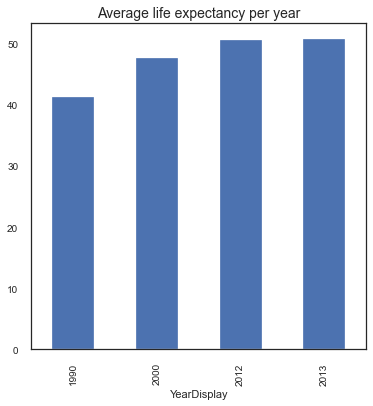

In [432]:
# check how average life expectancy changed over the years
life_bar = life_expectancy.groupby('YearDisplay')['Numeric'].mean()
life_bar.plot(kind='bar', figsize=(6,6)).set_title('Average life expectancy per year', fontsize=14)

Breaking down by year, the mean life expectancy has increased: within 23 years with almost 10 years!

In [503]:
# create df for plotting gender per year
gender_df = life_expectancy.groupby(['YearDisplay', 'SexDisplay'])['Numeric'].mean().reset_index()

In [504]:
gender_df.head()

,YearDisplay,SexDisplay,Numeric
0,1990,Both sexes,41.335052
1,1990,Female,43.208763
2,1990,Male,39.443299
3,2000,Both sexes,47.635334
4,2000,Female,49.420069


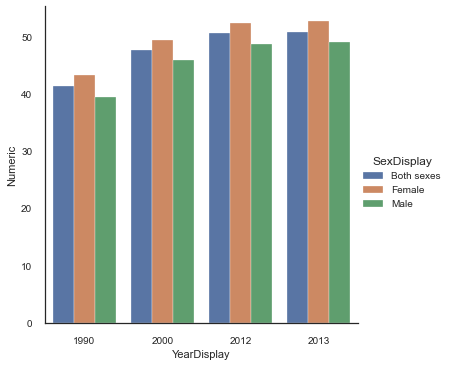

In [435]:
sns.set_style("white")
sns.catplot(data=gender_df, kind="bar", x="YearDisplay", y="Numeric", hue="SexDisplay")

Breaking down the data not only by year but by gender, we can see difference between the sexes: females have a somewhat hogher age for life expectance than men, and although it is increasing for both genders, the difference between the two seems to be constant.

In [436]:
# let's explore further our data
life_expectancy['RegionDisplay'].value_counts()

Europe                   1749
Africa                   1524
Americas                 1155
Western Pacific           891
Eastern Mediterranean     726
South_East Asia           363
Name: RegionDisplay, dtype: int64

There are 1749 observations that refer to a European country and only 363 which refer to a country in South-East Asia.

In [437]:
# filter down for the latest year, since we are interested in only these life expectancy values for the analysis.
le_2013 = life_expectancy[life_expectancy['YearDisplay']==2013]

In [438]:
le_2013.head(3)

,GhoCode,GhoDisplay,PublishStateCode,PublishStateDisplay,YearCode,YearDisplay,RegionCode,RegionDisplay,WorldBankIncomeGroupGroupCode,WorldBankIncomeGroupDisplay,CountryCode,CountryDisplay,SexCode,SexDisplay,DisplayValue,Numeric
0,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,BTSX,Both sexes,61,61.25205
1,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,FMLE,Female,62,61.97733
2,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,MLE,Male,61,60.51228


In [439]:
le_2013.describe(include=[np.object]) 

,GhoCode,GhoDisplay,PublishStateCode,PublishStateDisplay,RegionCode,RegionDisplay,WorldBankIncomeGroupGroupCode,WorldBankIncomeGroupDisplay,CountryCode,CountryDisplay,SexCode,SexDisplay
count,1746,1746,1746,1746,1746,1746,582,582,1746,1746,1746,1746
unique,3,3,1,1,6,6,4,4,194,194,3,3
top,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),PUBLISHED,Published,EUR,Europe,WB_LMI,Lower_middle_income,PHL,Niger,FMLE,Male
freq,582,582,1746,1746,477,477,162,162,9,9,582,582


Inspecting only the textual columns, we can see that there are 194 unique  countries and that the World Bank income group has 4 categories. It seems PublishStateCode and PublishStateDisplay carry no information.

In [440]:
life_expectancy['WorldBankIncomeGroupDisplay'].value_counts()

Lower_middle_income    1440
High_income            1377
Upper_middle_income    1215
Low_income             1212
Name: WorldBankIncomeGroupDisplay, dtype: int64

Also interesting that the majority of countries fall within the Lower middle income group and the lower- and the upper middle income groups have almost the same number of countries. Other than that the groups are roughly the same.

### 4. Merge drinks and lifetime data by country

In [441]:
# merge le_2013 and drinks on country name
le_drinks = le_2013.merge(drinks.rename(columns={'country':'CountryDisplay'}), how='inner', on='CountryDisplay')

In [442]:
le_drinks.head(3)

,GhoCode,GhoDisplay,PublishStateCode,PublishStateDisplay,YearCode,YearDisplay,RegionCode,RegionDisplay,WorldBankIncomeGroupGroupCode,WorldBankIncomeGroupDisplay,CountryCode,CountryDisplay,SexCode,SexDisplay,DisplayValue,Numeric,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,BTSX,Both sexes,61,61.25205,0.0,0.0,0.0,0.0
1,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,FMLE,Female,62,61.97733,0.0,0.0,0.0,0.0
2,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,MLE,Male,61,60.51228,0.0,0.0,0.0,0.0


## Correlations

### 5. Calculate correlation between expected lifetime and total liters of pure alcohol

In [443]:
le_drinks_btsx = le_drinks[le_drinks['SexCode'] == 'BTSX']
le_drinks_btsx = le_drinks_btsx[le_drinks_btsx['GhoCode'] == 'WHOSIS_000001']                     

In [444]:
le_drinks_btsx.head(3)

,GhoCode,GhoDisplay,PublishStateCode,PublishStateDisplay,YearCode,YearDisplay,RegionCode,RegionDisplay,WorldBankIncomeGroupGroupCode,WorldBankIncomeGroupDisplay,CountryCode,CountryDisplay,SexCode,SexDisplay,DisplayValue,Numeric,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,BTSX,Both sexes,61,61.25205,0.0,0.0,0.0,0.0000
9,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EUR,Europe,NaN,NaN,ALB,Albania,BTSX,Both sexes,74,74.13000,89.0,132.0,54.0,4.8675
18,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,AFR,Africa,NaN,NaN,DZA,Algeria,BTSX,Both sexes,72,71.82955,25.0,0.0,14.0,0.6903


In [445]:
# reset index
le_drinks_btsx = le_drinks_btsx.reset_index(drop=True)

In [446]:
le_drinks_btsx.isnull().sum()

GhoCode                            0
GhoDisplay                         0
PublishStateCode                   0
PublishStateDisplay                0
YearCode                           0
YearDisplay                        0
RegionCode                         0
RegionDisplay                      0
WorldBankIncomeGroupGroupCode    167
WorldBankIncomeGroupDisplay      167
CountryCode                        0
CountryDisplay                     0
SexCode                            0
SexDisplay                         0
DisplayValue                       0
Numeric                            0
beer_servings                      0
spirit_servings                    1
wine_servings                      1
total_litres_of_pure_alcohol       2
dtype: int64

In [447]:
# need to drop those observations where total liter is null
le_drinks_btsx = le_drinks_btsx.dropna(subset=['total_litres_of_pure_alcohol'])

In [448]:
from scipy.stats import pearsonr

In [449]:
# Convert dataframe into series
list1 = le_drinks_btsx['Numeric']
list2 = le_drinks_btsx['total_litres_of_pure_alcohol']

In [450]:
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation is: %.3f' % corr)

Pearsons correlation is: 0.522


The Pearson correlation is 0.52, which means there is a positive moderate correlation between life expectancy in a country and total liters of pure alcohol consumed. Hoverever, there is a chance that there are other factors that influence life expencancy.

### 6. Read and prepare CountriesOfTheWorld.xlsx

In [451]:
countries = pd.read_excel (r'C:\Users\ilike\Documents\CEU\Courses\2021_Spring\Mastering the process of data science\Assignment\CountriesOfTheWorld.xls', 
                           sheet_name = 'Sheet1', skiprows = 2, header = 1 )


In [452]:
countries.head(5)

,Country,Region,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,Literacy,Phones,Arable,Crops,Other,Birthrate,Deathrate
0,NaN,NaN,NaN,sq. mi.,per sq. mi.,coast/area ratio,NaN,per 1000 births,$ per capita,%,per 1000,%,%,%,NaN,NaN
1,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500,47.96,0,23.06,163.07,700,36,3.22,12.13,0.22,87.65,46.60,20.34
2,Albania,EASTERN EUROPE,3581655.0,28748,124.59,1.26,-4.93,21.52,4500,86.5,71.2,21.09,4.42,74.49,15.11,5.22
3,Algeria,NORTHERN AFRICA,32930091.0,2381740,13.83,0.04,-0.39,31,6000,70,78.1,3.22,0.25,96.53,17.14,4.61
4,American Samoa,OCEANIA,57794.0,199,290.42,58.29,-20.71,9.27,8000,97,259.54,10,15,75,22.46,3.27


In [453]:
# drop first row
countries = countries[1:]

In [454]:
#reset index
countries = countries.reset_index(drop=True)

In [455]:
countries.head(3)

,Country,Region,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,Literacy,Phones,Arable,Crops,Other,Birthrate,Deathrate
0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500,47.96,0,23.06,163.07,700,36,3.22,12.13,0.22,87.65,46.60,20.34
1,Albania,EASTERN EUROPE,3581655.0,28748,124.59,1.26,-4.93,21.52,4500,86.5,71.2,21.09,4.42,74.49,15.11,5.22
2,Algeria,NORTHERN AFRICA,32930091.0,2381740,13.83,0.04,-0.39,31,6000,70,78.1,3.22,0.25,96.53,17.14,4.61


In [456]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           227 non-null    object 
 1   Region            227 non-null    object 
 2   Population        227 non-null    float64
 3   Area              227 non-null    object 
 4   Pop. Density      227 non-null    object 
 5   Coastline         227 non-null    object 
 6   Net migration     224 non-null    float64
 7   Infant mortality  224 non-null    object 
 8   GDP               226 non-null    object 
 9   Literacy          209 non-null    object 
 10  Phones            223 non-null    object 
 11  Arable            225 non-null    object 
 12  Crops             225 non-null    object 
 13  Other             225 non-null    object 
 14  Birthrate         224 non-null    float64
 15  Deathrate         223 non-null    float64
dtypes: float64(4), object(12)
memory usage: 28.5

Some columns doesn't seem to have the right data type. All objects need to be transformed into floats, more over there are missing values in columns other than the first 6 columns.

In [457]:
countries = countries.astype({'Area': 'float64', 'Pop. Density': 'float64', 'Coastline': 'float64', 'Infant mortality': 'float64', 'GDP': 'float64', 'Literacy': 'float64', 'Phones': 'float64', 'Arable': 'float64', 'Crops': 'float64', 'Other': 'float64'})

In [458]:
countries.dtypes

Country              object
Region               object
Population          float64
Area                float64
Pop. Density        float64
Coastline           float64
Net migration       float64
Infant mortality    float64
GDP                 float64
Literacy            float64
Phones              float64
Arable              float64
Crops               float64
Other               float64
Birthrate           float64
Deathrate           float64
dtype: object

In [459]:
countries.duplicated().sum()

0

In [460]:
countries.isnull().sum()

Country              0
Region               0
Population           0
Area                 0
Pop. Density         0
Coastline            0
Net migration        3
Infant mortality     3
GDP                  1
Literacy            18
Phones               4
Arable               2
Crops                2
Other                2
Birthrate            3
Deathrate            4
dtype: int64

There are several missing values, but not that much. I intend not to drop those rows since every country appears only once in the dataset, rather I replace with the mean of each column.

In [461]:
countries.mean()

Population          2.874028e+07
Area                5.982270e+05
Pop. Density        3.790425e+02
Coastline           2.116533e+01
Net migration       3.812500e-02
Infant mortality    3.550696e+01
GDP                 9.689823e+03
Literacy            8.283828e+01
Phones              2.360577e+02
Arable              1.379711e+01
Crops               4.564222e+00
Other               8.163831e+01
Birthrate           2.211473e+01
Deathrate           9.241345e+00
dtype: float64

In [462]:
# impute the column means for the missing values
countries = countries.fillna(countries.mean())

In [463]:
countries.describe()

,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,Literacy,Phones,Arable,Crops,Other,Birthrate,Deathrate
count,2.270000e+02,2.270000e+02,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,2.874028e+07,5.982270e+05,379.042511,21.165330,0.038125,35.506964,9689.823009,82.838278,236.057668,13.797111,4.564222,81.638311,22.114732,9.241345
std,1.178913e+08,1.790282e+06,1660.187541,72.286863,4.856710,35.154225,10026.881258,18.920483,225.965455,12.982573,8.324390,16.069256,11.102286,4.945670
min,7.026000e+03,2.000000e+00,0.030000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.170000,0.000000,0.000000,33.330000,7.290000,2.290000
25%,4.376240e+05,4.647500e+03,29.155000,0.100000,-0.905000,8.215000,1900.000000,76.400000,38.515000,3.380000,0.190000,71.985000,12.725000,5.975000
50%,4.786994e+06,8.660000e+04,78.770000,0.730000,0.000000,21.050000,5600.000000,90.300000,181.590000,10.530000,1.080000,85.380000,18.900000,8.170000
75%,1.749777e+07,4.418110e+05,190.110000,10.345000,0.980000,55.335000,15700.000000,97.800000,382.895000,20.000000,4.557111,95.230000,29.770000,10.580000
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.550000,62.110000,50.680000,100.000000,50.730000,29.740000


Let's check few variables:

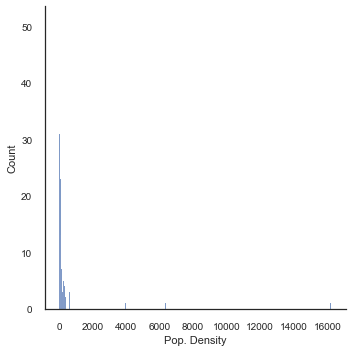

In [464]:
sns.displot(countries, x="Pop. Density", binwidth=25)

From the histogram we can see there are extreme values for population density, which are above 15000 per sq. mi., let's find these:

In [465]:
countries.sort_values(by = 'Pop. Density', ascending = False)[:2]

,Country,Region,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,Literacy,Phones,Arable,Crops,Other,Birthrate,Deathrate
138,Monaco,WESTERN EUROPE,32543.0,2.0,16271.50,205.00,7.75,5.43,27000.0,99.0,1035.55,0.0,0.0,100.0,9.19,12.91
122,Macau,ASIA (EX. NEAR EAST),453125.0,28.0,16183.04,146.43,4.86,4.39,19400.0,94.5,384.88,0.0,0.0,100.0,8.48,4.47


Indeed Monaco is a city-state and Macau, which is according to wikipedia the world's most populated area, so these data points are accurately large.

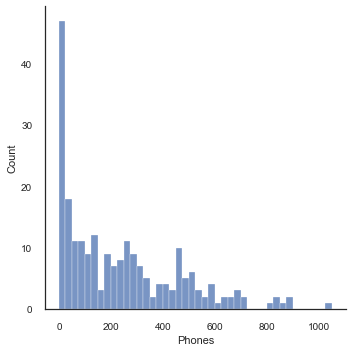

In [466]:
sns.displot(countries, x="Phones", binwidth=25)

In [467]:
countries.sort_values(by = 'Phones', ascending = False)[:2]

,Country,Region,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,Literacy,Phones,Arable,Crops,Other,Birthrate,Deathrate
138,Monaco,WESTERN EUROPE,32543.0,2.0,16271.50,205.00,7.75,5.43,27000.0,99.0,1035.55,0.00,0.00,100.00,9.19,12.91
214,United States,NORTHERN AMERICA,298444215.0,9631420.0,30.99,0.21,3.41,6.50,37800.0,97.0,897.99,19.13,0.22,80.65,14.14,8.26


Phones per 1000 inhabitant is highest again for Monaco, but it understanble and the second in the rank is the US: almost the total opposite of Monaco. The US has very low population density but very high area and thus population, which makes phone coverage per 1000 so high.

<AxesSubplot:xlabel='GDP', ylabel='Birthrate'>

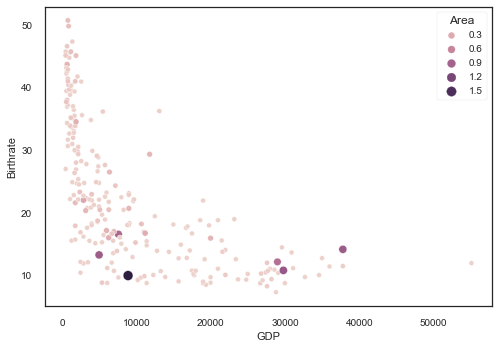

In [468]:
sns.scatterplot(data=countries, x="GDP", y="Birthrate",  hue = "Area", size = "Area")

A worth to look at relationship is between Birthrate and GDP: very high birthrates can be observed in countries with low GDP, and there is not much variation by population size. With area added, it is a bit more clear that bigger countries have lower birthrate in general regardless of their GDP.

In [471]:
# before merge I decided to drop some columns from the le_drinks_btsx dataframe
le_drinks_btsx.drop(['GhoCode','GhoDisplay','PublishStateCode','PublishStateDisplay','YearCode', 'YearDisplay', 'RegionCode','WorldBankIncomeGroupGroupCode','CountryCode','SexCode','SexDisplay'], axis=1, inplace=True)

In [474]:
countries.rename(columns={'Country': 'CountryDisplay'}, inplace = True)

In [488]:
# remove all trailing spaces from the country names in the countries df, this was blocking the merge
countries['CountryDisplay'] = countries['CountryDisplay'].str.rstrip()

In [478]:
# le_drinks_btsx.CountryDisplay = le_drinks_btsx.CountryDisplay.astype(str)
# countries.CountryDisplay = countries.CountryDisplay.astype(str)

In [490]:
le_countries = pd.merge(le_drinks_btsx, countries, how = 'left', on = ['CountryDisplay'])

In [494]:
le_countries.head()

,RegionDisplay,WorldBankIncomeGroupDisplay,CountryDisplay,DisplayValue,Numeric,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,Region,...,Net migration,Infant mortality,GDP,Literacy,Phones,Arable,Crops,Other,Birthrate,Deathrate
0,Eastern Mediterranean,NaN,Afghanistan,61,61.25205,0.0,0.0,0.0,0.0000,ASIA (EX. NEAR EAST),...,23.06,163.07,700.0,36.0,3.22,12.13,0.22,87.65,46.60,20.34
1,Europe,NaN,Albania,74,74.13000,89.0,132.0,54.0,4.8675,EASTERN EUROPE,...,-4.93,21.52,4500.0,86.5,71.20,21.09,4.42,74.49,15.11,5.22
2,Africa,NaN,Algeria,72,71.82955,25.0,0.0,14.0,0.6903,NORTHERN AFRICA,...,-0.39,31.00,6000.0,70.0,78.10,3.22,0.25,96.53,17.14,4.61
3,Europe,NaN,Andorra,83,82.65301,245.0,138.0,312.0,12.3015,WESTERN EUROPE,...,6.60,4.05,19000.0,100.0,497.18,2.22,0.00,97.78,8.71,6.25
4,Africa,NaN,Angola,52,51.74093,217.0,57.0,45.0,5.6463,SUB-SAHARAN AFRICA,...,0.00,191.19,1900.0,42.0,7.78,2.41,0.24,97.35,45.11,24.20


### 8. Find factors that are highly correlated to the expected lifetime

In [495]:
# check correlation for numeric variables
to_drop = set(le_countries.columns) - {'RegionDisplay', 'WorldBankIncomeGroupDisplay', 'CountryDisplay', 'Region'}
le_countries[list(to_drop)].corr()

,Area,Birthrate,Net migration,Coastline,Arable,Crops,beer_servings,Literacy,wine_servings,Infant mortality,Pop. Density,Other,DisplayValue,GDP,Deathrate,spirit_servings,Numeric,Phones,Population,total_litres_of_pure_alcohol
Area,1.000000,-0.065680,0.067427,-0.110140,-0.109756,-0.165267,0.092734,0.012709,0.001124,-0.014559,-0.064780,0.167951,0.044802,0.062664,-0.058802,0.048055,0.045430,0.066147,0.535073,0.065310
Birthrate,-0.065680,1.000000,-0.050458,-0.058048,-0.230488,0.042190,-0.539368,-0.782862,-0.527652,0.849831,-0.141843,0.170930,-0.817211,-0.649092,0.392894,-0.492166,-0.817832,-0.745257,-0.059946,-0.669170
Net migration,0.067427,-0.050458,1.000000,0.053383,-0.081451,-0.307273,0.005177,-0.049002,0.202505,0.011928,0.219946,0.210774,0.144402,0.427448,0.072796,-0.265814,0.146287,0.285554,-0.012423,-0.026803
Coastline,-0.110140,-0.058048,0.053383,1.000000,-0.125957,0.261920,-0.017267,0.105912,-0.093076,-0.126327,0.414879,-0.018028,0.126595,0.013954,-0.111165,-0.081117,0.123655,0.167797,-0.065862,-0.077660
Arable,-0.109756,-0.230488,-0.081451,-0.125957,1.000000,0.126925,0.205258,0.098518,0.169035,-0.138329,-0.056821,-0.886416,0.085773,0.026413,0.027391,0.267615,0.085376,0.097156,0.197908,0.274970
Crops,-0.165267,0.042190,-0.307273,0.261920,0.126925,1.000000,-0.163045,0.106958,-0.118839,-0.102037,-0.032563,-0.571654,0.024824,-0.178789,-0.213866,0.047015,0.024712,-0.095870,-0.053074,-0.106805
beer_servings,0.092734,-0.539368,0.005177,-0.017267,0.205258,-0.163045,1.000000,0.501225,0.545010,-0.448436,-0.105660,-0.093665,0.413581,0.466539,0.027922,0.448716,0.413598,0.472438,-0.074137,0.879279
Literacy,0.012709,-0.782862,-0.049002,0.105912,0.098518,0.106958,0.501225,1.000000,0.432020,-0.749924,0.089402,-0.131397,0.680396,0.506337,-0.346188,0.469214,0.679175,0.598492,-0.047840,0.603976
wine_servings,0.001124,-0.527652,0.202505,-0.093076,0.169035,-0.118839,0.545010,0.432020,1.000000,-0.422025,-0.063588,-0.084340,0.476492,0.628390,-0.020235,0.204746,0.477230,0.607565,-0.080468,0.731809
Infant mortality,-0.014559,0.849831,0.011928,-0.126327,-0.138329,-0.102037,-0.448436,-0.749924,-0.422025,1.000000,-0.118700,0.162077,-0.855890,-0.595094,0.640982,-0.391506,-0.856201,-0.668069,0.008620,-0.542673


<AxesSubplot:>

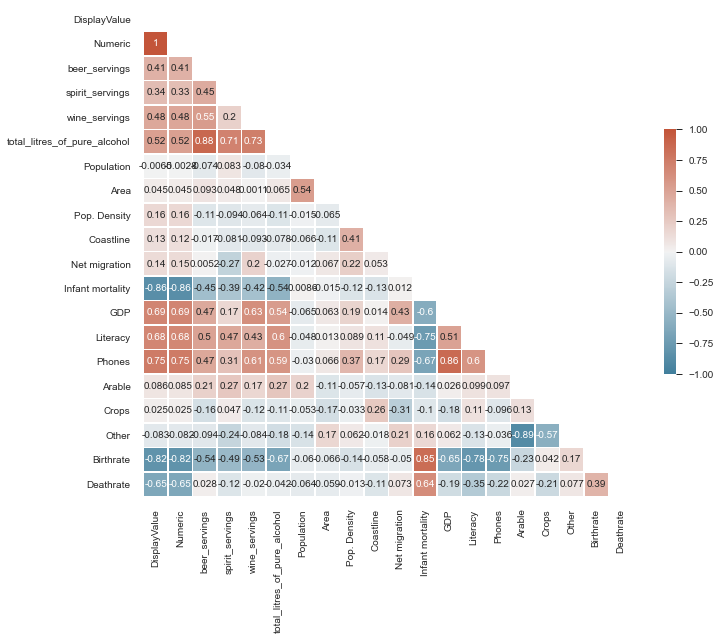

In [500]:
# It is more helpful to put the numbers on a colored matrix

# Compute the correlation matrix
corr = le_countries.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot = True, vmax=1, vmin = -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Based on the above correlation matrix, DisplayValue and Numeric (they are the same basically, aka life expectancy), have a strong negative correlation with Infant mortality and Birthrate; and have a somewhat strong positive correlation with Phones and GDP/Literacy.

### 9. Summarize the insights, explain the most important factor

In the above matrix we can indeed find the 0.52 correlation between total liters of alcohol and life expectancy, but other factors have even stronger correlation with these two variables. Starting with life expectancy the correlations worth mentioning are the following in descending order:
* Infant mortality per 1000 births: the higher the mortality the lower life expectancy is in a certain country. This can be the case where access to hospitals or basic medical services is limited and/or prenatal care is not that advanced. There is a higher rate of babies born with deseases that were not detected before or when detected after the birth, applying medical care is not even successful. So in this case babies' chance of being healthy or given the proper treatment is lower in these countries. Infant mortality is inversely strongly correlated with literacy, i.e in countries where then number of literate inhabitants is low. Not enough information is reaching parents about the threats and probably also not enough care and caution is taken during one's pregnancy. Self-evidently there is a 0.85 correlation between infant mortality and birthrate - the higher the rate of newborn babies the higher proportion of infants could die.
* Phones per 1000: it shows 0.75 correlation with life expectancy, but even stronger (0.86) relationship with GDP. In countries with high GDP more inhabitants can afford to have a phone and that loops back to birthrate with a negative correlation of -0.65. This could be an interesting relationship to think about: in case of higher GDP the birthrate will descrease. This is the case in the first world countries, where despite wealth there are only 1 or maximum 2 children born per family on average.
* Birthrate (the number of live births per thousand of population per year): Since birthrate is highly correlated with infant mortality, it is also highly correlated with life expectancy I think.
* GDP and Literacy go hand in hand also in terms of total liters of alcohol consumed.

All these suggest to me that although life expectancy depends the most on child mortality, that can be traced back to the GDP of the country. Many factors have intertwined effects, probably enforcing each other, so these are not the true measures of effect for these factors.